> The problem is to classify the type of iris based on four different features (explanatory variables). Specifically, the goal is to use the features (sepal length, sepal width, petal length, and petal width) to predict the type of iris (setosa, versicolor, or virginica). This is a classification problem because we are trying to classify the types of irises based on their features. The iris dataset contains 150 observations in total, with 50 observations for each type of iris. The goal is to use this dataset to train a classification model that can accurately classify new observations of irises based on their features.

> The problem in this assignment is to practice binary classification using the iris dataset. Specifically, the focus is on classifying two types of irises (virgicolor and virginica) based on only two features (sepal_length and petal_length). This is a binary classification problem because we are only trying to classify two types of irises. The actual problem is to demonstrate the use of supervised learning methods for binary classification using a subset of features from the iris dataset. Additionally, the text notes that although visualization can be helpful, it is important to use multiple features in actual learning and estimation tasks. Therefore, feature extraction methods such as principal component analysis may be used to handle high-dimensional datasets.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a dataframe to store the feature data
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create a dataframe to store the target variable data
y = pd.DataFrame(iris.target, columns=['Species'])

# Print the first 5 rows of the X dataframe
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
# Select only the rows with 'virgicolor' and 'virginica' species
y_binary = y.loc[y['Species'].isin([1, 2])]

# Select only the 'sepal_length' and 'petal_length' features for the selected rows
X_binary = X.loc[y_binary.index, ['sepal length (cm)', 'petal length (cm)']]


In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Create a dataframe to store the feature data
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Create a dataframe to store the target variable data
y = pd.DataFrame(iris.target, columns=['Species'])

# Extract only the data for the 'virgicolor' and 'virginica' species
X = X.loc[y['Species'] != 0]
y = y.loc[y['Species'] != 0]

# Extract only the data for the 'sepal_length' and 'petal_length' features
X = X[['sepal length (cm)', 'petal length (cm)']]

# Reset the index of the dataframes
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

# Print the first 5 rows of the X dataframe
print(X.head())


   sepal length (cm)  petal length (cm)
0                7.0                4.7
1                6.4                4.5
2                6.9                4.9
3                5.5                4.0
4                6.5                4.6


<Axes: xlabel='Species', ylabel='petal length (cm)'>

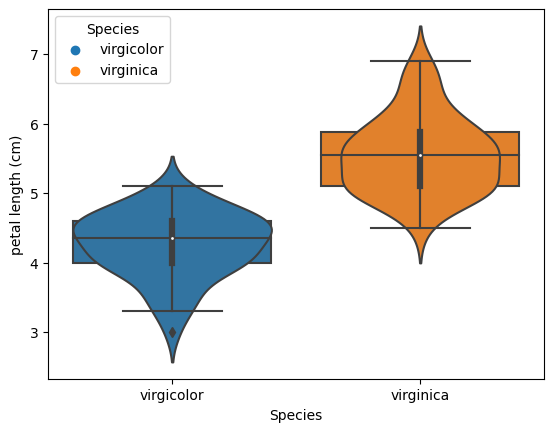

In [4]:
import seaborn as sns

# Create a new dataframe with the selected features and categories
df = X.loc[:, ['sepal length (cm)', 'petal length (cm)']]
df['Species'] = y['Species'].map({1: 'virgicolor', 2: 'virginica'})

# Scatterplot
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='Species')

# Boxplot
sns.boxplot(data=df, x='Species', y='petal length (cm)')

# Violinplot
sns.violinplot(data=df, x='Species', y='petal length (cm)')


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)


In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (112, 4)
y_train shape: (112, 1)
X_val shape: (38, 4)
y_val shape: (38, 1)


In [18]:
print("X_train head:\n", X_train.head())
print("y_train head:\n", y_train.head())
print("X_val head:\n", X_val.head())
print("y_val head:\n", y_val.head())


X_train head:
      sepal_length  sepal_width  petal_length  petal_width
4             5.0          3.6           1.4          0.2
32            5.2          4.1           1.5          0.1
142           5.8          2.7           5.1          1.9
85            6.0          3.4           4.5          1.6
86            6.7          3.1           4.7          1.5
y_train head:
      Species
4          0
32         0
142        2
85         1
86         1
X_val head:
      sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
y_val head:
      Species
73         1
18         0
118        2
78         1
76         1


In [20]:
import numpy as np

# Print the mean and standard deviation of each feature in the standardized training data
print("Standardized training data:")
print("  Mean:", np.mean(X_train_std, axis=0))
print("  Std:", np.std(X_train_std, axis=0))

# Print the mean and standard deviation of each feature in the standardized validation data
print("Standardized validation data:")
print("  Mean:", np.mean(X_val_std, axis=0))
print("  Std:", np.std(X_val_std, axis=0))


Standardized training data:
  Mean: [ 1.72282823e-15 -4.64410256e-16 -4.24263799e-16  7.07767178e-16]
  Std: [1. 1. 1. 1.]
Standardized validation data:
  Mean: [ 0.06281356  0.15561063 -0.11228935 -0.07926678]
  Std: [1.04543209 0.98400588 1.06654537 1.07558401]


In [21]:
import pandas as pd

# Create dataframes for the standardized training and validation sets
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)
X_val_std_df = pd.DataFrame(X_val_std, columns=X_val.columns)

# Display the first few rows of the standardized training and validation sets
print("Standardized training data:")
print(X_train_std_df.head())
print("Standardized validation data:")
print(X_val_std_df.head())


Standardized training data:
   sepal_length  sepal_width  petal_length  petal_width
0     -1.018271     1.286460     -1.393389    -1.362177
1     -0.773010     2.435452     -1.335503    -1.496476
2     -0.037227    -0.781725      0.748378     0.920908
3      0.208034     0.826864      0.401064     0.518011
4      1.066448     0.137469      0.516836     0.383712
Standardized validation data:
   sepal_length  sepal_width  petal_length  petal_width
0      0.330664    -0.551926      0.516836    -0.019186
1     -0.159858     1.746057     -1.219732    -1.227878
2      2.292753    -1.011523      1.790319     1.458105
3      0.208034    -0.322128      0.401064     0.383712
4      1.189078    -0.551926      0.574721     0.249413


In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier object
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_std, y_train)

# Predict the class labels for the validation data
y_pred = knn.predict(X_val_std)

# Print the accuracy score for the validation data
print("Accuracy (5-nn):", knn.score(X_val_std, y_val))

# Try 1-nn and 3-nn
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_std, y_train)
y_pred1 = knn1.predict(X_val_std)
print("Accuracy (1-nn):", knn1.score(X_val_std, y_val))

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_std, y_train)
y_pred3 = knn3.predict(X_val_std)
print("Accuracy (3-nn):", knn3.score(X_val_std, y_val))


Accuracy (5-nn): 1.0
Accuracy (1-nn): 1.0
Accuracy (3-nn): 1.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calculate metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
f1 = f1_score(y_val, y_pred, average='macro')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

# Print confusion matrix
conf_mat = confusion_matrix(y_val, y_pred)
print("Confusion matrix:\n", conf_mat)


Accuracy: 0.4473684210526316
Precision: 0.45656565656565656
Recall: 0.4487179487179487
F1 score: 0.4492592592592593
Confusion matrix:
 [[6 2 4]
 [2 7 4]
 [7 2 4]]


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# generate synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# evaluate model performance on validation data
y_pred = model.predict(X_valid)
print("Accuracy: {:.3f}".format(accuracy_score(y_valid, y_pred)))
print("Precision: {:.3f}".format(precision_score(y_valid, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_valid, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_valid, y_pred)))
print("Confusion matrix:\n", confusion_matrix(y_valid, y_pred))

# plot decision boundary
decision_region(X_train, y_train, model, title='Decision Region', xlabel='Feature 1', ylabel='Feature 2', target_names=['Class 0', 'Class 1'])


Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Confusion matrix:
 [[ 9  0]
 [ 0 11]]


Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1-score: 1.000
Confusion matrix:
 [[ 9  0]
 [ 0 11]]


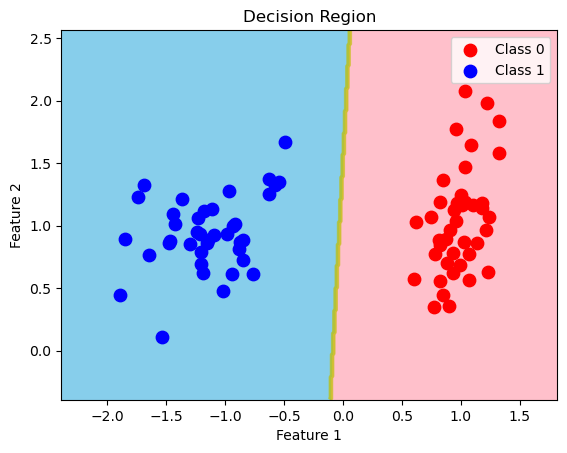

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# generate synthetic data
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                            random_state=1, n_clusters_per_class=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# evaluate model performance on validation data
y_pred = model.predict(X_valid)
print("Accuracy: {:.3f}".format(accuracy_score(y_valid, y_pred)))
print("Precision: {:.3f}".format(precision_score(y_valid, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_valid, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_valid, y_pred)))
print("Confusion matrix:\n", confusion_matrix(y_valid, y_pred))

# plot decision boundary
decision_region(X_train, y_train, model, title='Decision Region', xlabel='Feature 1', ylabel='Feature 2', target_names=['Class 0', 'Class 1'])


In [79]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target


In [80]:
# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [81]:
# Preprocessing data using StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)


Accuracy: 0.6888888888888889
Precision: 0.6931216931216931
Recall: 0.6888888888888889
F1-score: 0.6759259259259258
Confusion Matrix:
 [[15  0  0]
 [ 0 11  4]
 [ 0 10  5]]


IndexError: list index out of range

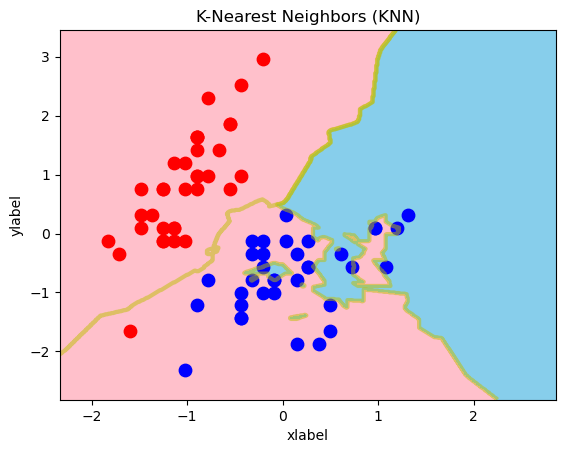

In [82]:
# Learning using K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_std, y_train)

# Estimation
y_pred = knn.predict(X_valid_std)

# Evaluation
print('Accuracy:', accuracy_score(y_valid, y_pred))
print('Precision:', precision_score(y_valid, y_pred, average='weighted'))
print('Recall:', recall_score(y_valid, y_pred, average='weighted'))
print('F1-score:', f1_score(y_valid, y_pred, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))

# Visualization
decision_region(X_train_std, y_train, knn, title='K-Nearest Neighbors (KNN)')


Accuracy: 0.7333333333333333
Precision: 0.7333333333333333
Recall: 0.7333333333333333
F1-score: 0.7333333333333333
Confusion Matrix:
 [[15  0  0]
 [ 0  9  6]
 [ 0  6  9]]


IndexError: list index out of range

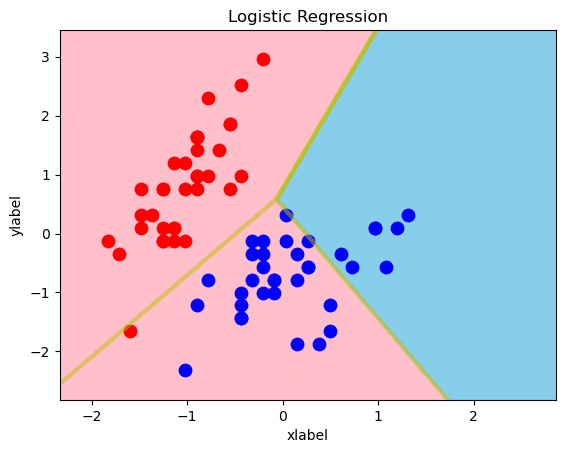

In [83]:
# Learning using Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_std, y_train)

# Estimation
y_pred = lr.predict(X_valid_std)

# Evaluation
print('Accuracy:', accuracy_score(y_valid, y_pred))
print('Precision:', precision_score(y_valid, y_pred, average='weighted'))
print('Recall:', recall_score(y_valid, y_pred, average='weighted'))
print('F1-score:', f1_score(y_valid, y_pred, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))

# Visualization
decision_region(X_train_std, y_train, lr, title='Logistic Regression')


In [96]:
from sklearn.svm import SVC

# Learning using Support Vector Machine (SVM)
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_std, y_train)

# Estimation
y_pred = svm.predict(X_valid_std)

# Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Accuracy:', accuracy_score(y_valid, y_pred))
print('Precision:', precision_score(y_valid, y_pred))
print('Recall:', recall_score(y_valid, y_pred))
print('F1 Score:', f1_score(y_valid, y_pred))
print('Confusion Matrix:', confusion_matrix(y_valid, y_pred))





Accuracy: 0.9666666666666667


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
from sklearn.datasets import load_iris

def load_data():
    iris = load_iris()
    X = iris.data
    y = iris.target
    return X, y

X, y = load_data()

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Without standardization
svm_no_std = SVC(kernel='linear', C=1.0, random_state=42)
svm_no_std.fit(X_train, y_train)
y_pred_no_std = svm_no_std.predict(X_valid)

# With standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_valid_std = scaler.transform(X_valid)

svm_std = SVC(kernel='linear', C=1.0, random_state=42)
svm_std.fit(X_train_std, y_train)
y_pred_std = svm_std.predict(X_valid_std)

# Compare the performance
print('Without standardization:')
print('Accuracy:', accuracy_score(y_valid, y_pred_no_std))

print('With standardization:')
print('Accuracy:', accuracy_score(y_valid, y_pred_std))


Without standardization:
Accuracy: 1.0
With standardization:
Accuracy: 0.9666666666666667


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_valid_std = sc.transform(X_valid)

# Create a SVM model with radial basis function kernel
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model to the training data
svm.fit(X_train_std, y_train)

# Estimate the target values of the validation set
y_pred = svm.predict(X_valid_std)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_valid, y_pred))
print('Precision:', precision_score(y_valid, y_pred, average='weighted'))
print('Recall:', recall_score(y_valid, y_pred, average='weighted'))
print('F1 Score:', f1_score(y_valid, y_pred, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_valid, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


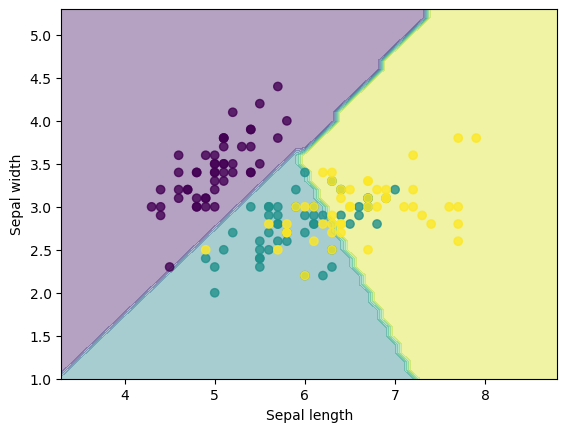

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load the dataset
iris = load_iris()
X = iris.data[:, :2]  # we only use the first two features for visualization
y = iris.target

# Train the SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X, y)

# Define the mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class of each point on the mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision region
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()
